In [1]:
#import libraries for this project
library(dplyr)
library(ggplot2)
library(caret)
library(lattice)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice


In [2]:
#import the csv data file that contains the names for babies
#examine the file to find a story to tell
babynames <- read.csv('/dsa/data/all_datasets/baby-names/NationalNames2.csv')
head(babynames)

Id,Name,Year,Gender,Count
<int>,<fct>,<int>,<fct>,<int>
4,Elizabeth,1880,F,1939
8,Alice,1880,F,1414
12,Clara,1880,F,1226
13,Ella,1880,F,1156
18,Nellie,1880,F,995
21,Maude,1880,F,858


In [3]:
#Exploring the data involving the name sam
name_sam <- babynames %>%
filter(Name == 'Sam')

head(name_sam)
tail(name_sam)
summary(name_sam)
nrow(name_sam)

Id,Name,Year,Gender,Count
<int>,<fct>,<int>,<fct>,<int>
978,Sam,1880,M,457
2970,Sam,1881,M,481
7149,Sam,1883,M,476
11675,Sam,1885,M,492
14053,Sam,1886,M,519
18952,Sam,1888,F,5


,Id,Name,Year,Gender,Count
,<int>,<fct>,<int>,<fct>,<int>
80,1608761,Sam,2008,M,604
81,1643542,Sam,2009,M,580
82,1677863,Sam,2010,M,550
83,1745490,Sam,2012,M,505
84,1801767,Sam,2014,F,12
85,1811989,Sam,2014,M,516


       Id                 Name         Year      Gender     Count       
 Min.   :    978   Sam      :85   Min.   :1880   F:34   Min.   :   5.0  
 1st Qu.:  91773   Aaban    : 0   1st Qu.:1910   M:51   1st Qu.:  10.0  
 Median : 455841   Aabid    : 0   Median :1949          Median : 469.0  
 Mean   : 599022   Aabriella: 0   Mean   :1948          Mean   : 507.1  
 3rd Qu.: 951789   Aadam    : 0   3rd Qu.:1984          3rd Qu.: 590.0  
 Max.   :1811989   Aadan    : 0   Max.   :2014          Max.   :2455.0  
                   (Other)  : 0                                         

[1] 85

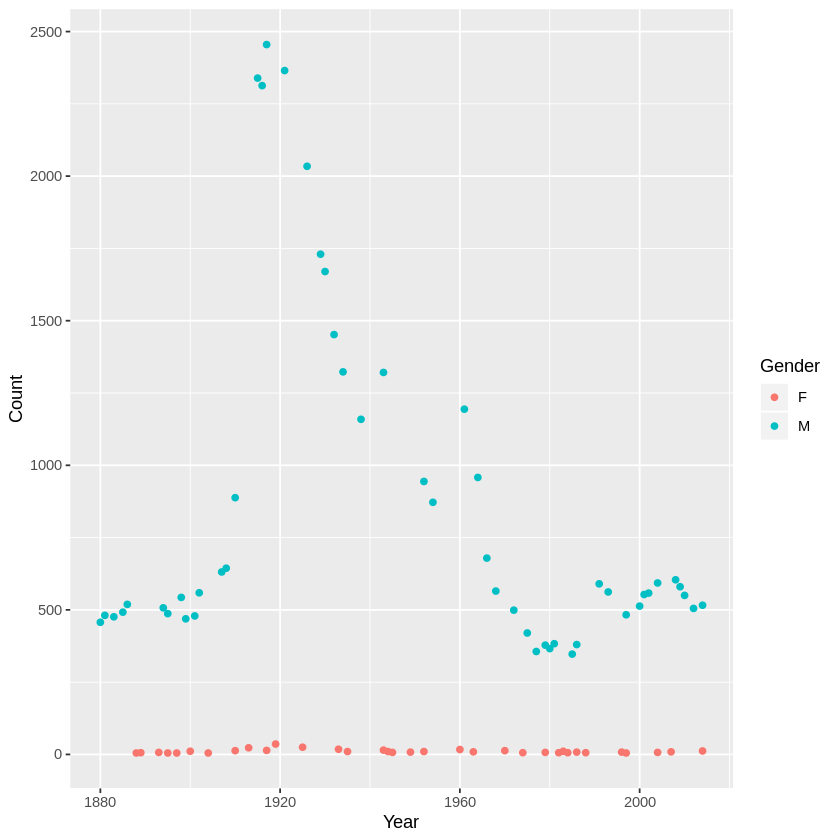

In [4]:
ggplot(name_sam, aes(x=Year, y=Count, color=Gender)) + geom_point()
#you can see that the most popular year for males named sam is between 1915-1980's
#there is a relatively linear decline that I would like to train a linear regression model
#I will train the model on the portion that is declining and test the model on the years following
#if all goes correctly the regression model would demonstrate how popular the name sam would be if 
#it continued to decline as if they are dependent on one another

In [5]:
popular_name_sam <- name_sam %>%
filter(Gender == 'M', Year >= 1915 & Year <= 1980)

head(popular_name_sam)
#this is going to be the data I train my model on
#my test data will be the years following 1980-2014 for males named sam

Id,Name,Year,Gender,Count
<int>,<fct>,<int>,<fct>,<int>
124756,Sam,1915,M,2339
134314,Sam,1916,M,2313
144159,Sam,1917,M,2455
186170,Sam,1921,M,2365
239694,Sam,1926,M,2034
270386,Sam,1929,M,1730


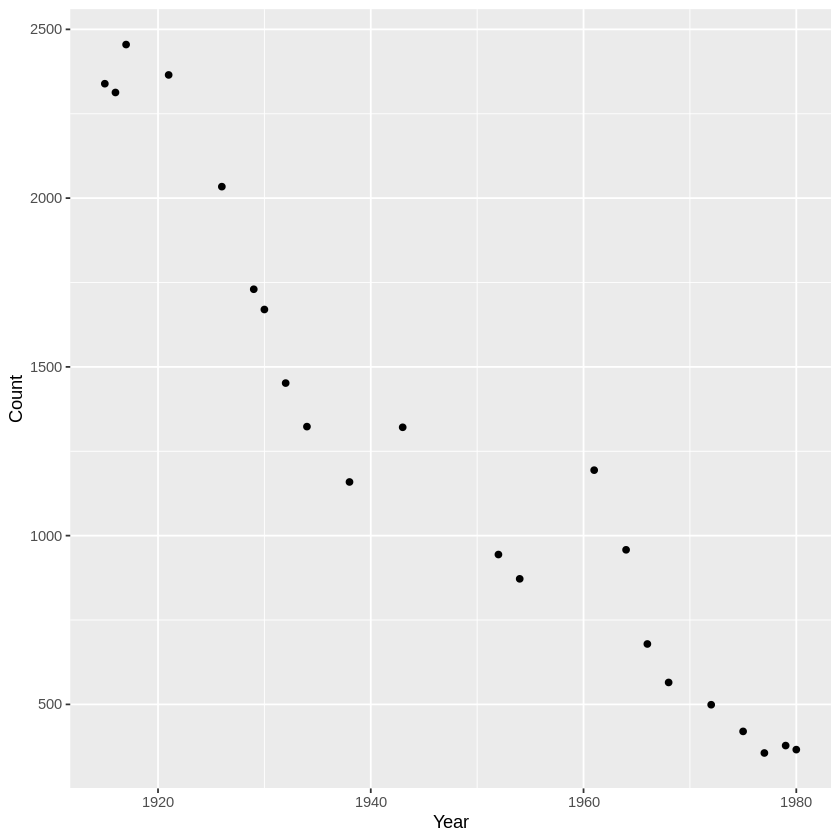

In [6]:
ggplot(popular_name_sam, aes(x=Year, y=Count)) + geom_point()

In [7]:
cor(popular_name_sam$Year, popular_name_sam$Count)
#this correlation shows that there is a massive decline in the name sam for males between the years 1915-1980
#my model will show what the name sam would look like if the decline were to continue at this rate from 1980-2014
#my model will also include the data before 1915 as well

[1] -0.961398

In [8]:
train <- popular_name_sam
train
#this is the data I will use to train my model
#I will test my model on the entire dataset after with the exception of only males named sam

Id,Name,Year,Gender,Count
<int>,<fct>,<int>,<fct>,<int>
124756,Sam,1915,M,2339
134314,Sam,1916,M,2313
144159,Sam,1917,M,2455
186170,Sam,1921,M,2365
239694,Sam,1926,M,2034
270386,Sam,1929,M,1730
280181,Sam,1930,M,1670
299122,Sam,1932,M,1452
317394,Sam,1934,M,1323


In [9]:
test <- name_sam %>%
filter(Gender=='M')

test

Id,Name,Year,Gender,Count
<int>,<fct>,<int>,<fct>,<int>
978,Sam,1880,M,457
2970,Sam,1881,M,481
7149,Sam,1883,M,476
11675,Sam,1885,M,492
14053,Sam,1886,M,519
35595,Sam,1894,M,507
38642,Sam,1895,M,487
47976,Sam,1898,M,543
51109,Sam,1899,M,469


In [10]:
frmla <- Count ~ Year
# this is the formula I will be using for my model
#I want to predict count as a dependent variable for the independent variable Year(time)

In [11]:
model1 <- train(frmla, train, method = 'lm')
summary(model1)
#the R-Squared in this model is .92 which is very high meaning each point on this trained model is
#close to being explained by the model's inputs


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-379.45 -103.42   -5.01  106.88  352.45 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 60259.411   3777.071   15.95 7.68e-13 ***
Year          -30.300      1.939  -15.62 1.13e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 202.3 on 20 degrees of freedom
Multiple R-squared:  0.9243,	Adjusted R-squared:  0.9205 
F-statistic: 244.2 on 1 and 20 DF,  p-value: 1.13e-12


In [12]:
test$pred <- predict(model1, test)

test
#this model shows that the predictions went from very accurate in the training to not very accurate in the testing model
#this is clear because the popularity of the name is not actually dependent on the year 
#having the name sam is not linearly correlated with the popularity by year

Id,Name,Year,Gender,Count,pred
<int>,<fct>,<int>,<fct>,<int>,<dbl>
978,Sam,1880,M,457,3295.83476
2970,Sam,1881,M,481,3265.53498
7149,Sam,1883,M,476,3204.93543
11675,Sam,1885,M,492,3144.33588
14053,Sam,1886,M,519,3114.03611
35595,Sam,1894,M,507,2871.63791
38642,Sam,1895,M,487,2841.33814
47976,Sam,1898,M,543,2750.43881
51109,Sam,1899,M,469,2720.13904


In [13]:
intercept <- coef(model1$finalModel)[1]
slope <- coef(model1$finalModel)[2]

head(test)

Id,Name,Year,Gender,Count,pred
<int>,<fct>,<int>,<fct>,<int>,<dbl>
978,Sam,1880,M,457,3295.835
2970,Sam,1881,M,481,3265.535
7149,Sam,1883,M,476,3204.935
11675,Sam,1885,M,492,3144.336
14053,Sam,1886,M,519,3114.036
35595,Sam,1894,M,507,2871.638


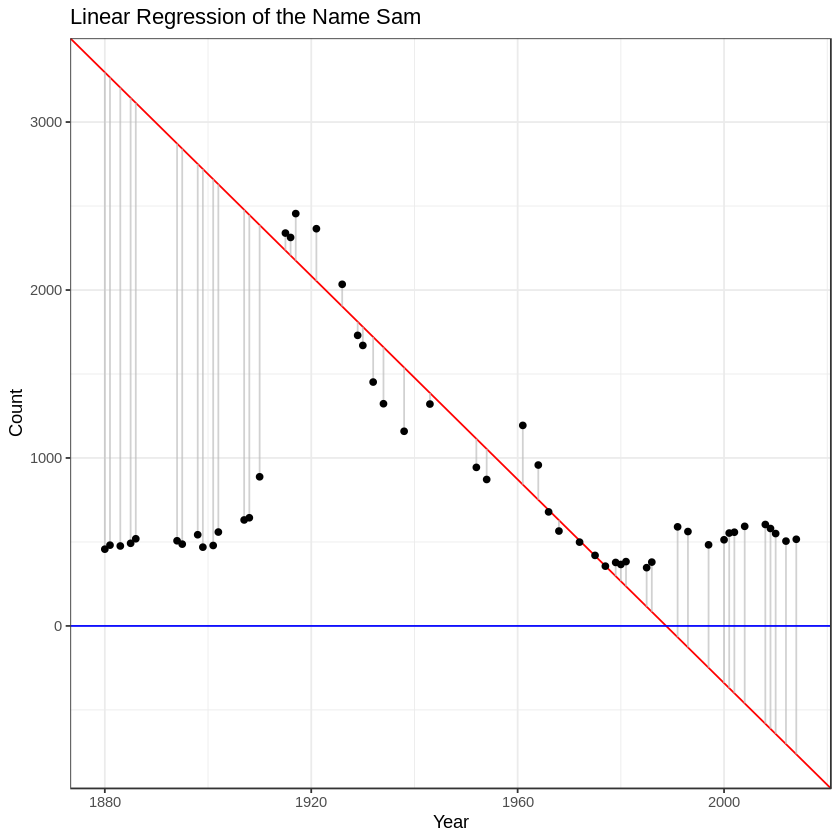

In [14]:
#I am visualizing the data. The red line is the linear regression line of the name sam. The blue line is the point where the 
#name sam reaches 0. The black dots are the actual data results from the csv file, and the lines connecting the linear 
#regression line to the dots show how far the line is from the actual points.
ggplot(test, aes(x=Year, y=Count)) +
    geom_abline(intercept = intercept, slope = slope, color = 'red') +
    geom_segment(aes(x=Year, xend=Year, y=Count, yend=pred), color = 'grey', alpha=.7) +
    geom_hline(yintercept = 0, color='blue') +
    geom_point() + 
    labs(title = 'Linear Regression of the Name Sam') + 
    theme_bw()

In [ ]:
# The visualization I made was a linear regression based off the year and count of the name sam (for males) 
# throughout the years. I trained my data based on the middle portion of the data (1915-1980) 
# where the data is heavily trending downward. This made the data seem as if the name sam's popularity(DV) 
# was a direct correlation with the years(IV). Obviously, this is not the case that someone's name is directly 
# correlated with year they are born. I then brought over the model to the entire dataset of years for the 
# name Sam(male) and graphed the results.

# The results showed a lot for people that might be interested in how names would look if they were correlated
# to the year the person was born. The red line is if the names stayed on a downward trend from the year 1915 
# all the way to 2014. The points on the graph are the actual counts of the name sam for each year. 
# The gray line segment branching from the points to the red line is the difference from the counts to the 
# actual predicted values. The blue horizontal line is if the names were to ever reach 0. If the predicted model 
# were to be true, there would be nobody born with the name sam by 1990. 

# Prediction models are valuable for predicting observations that have a dependent variable and an independent variable. 
# This is just an example to test my skills of exploring data and telling a story using the data. 